# Reading and Understanding Data

In [5]:
import warnings
warnings.filterwarnings('ignore')

# importing numpy, pandas and data visualisation packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [6]:
advertising = pd.DataFrame(pd.read_csv(r"C:\Users\Rupchand Bijwe\Downloads\sales prediction\advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Inspection

In [7]:
advertising.shape

(200, 4)

In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

In [10]:
#Checking null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

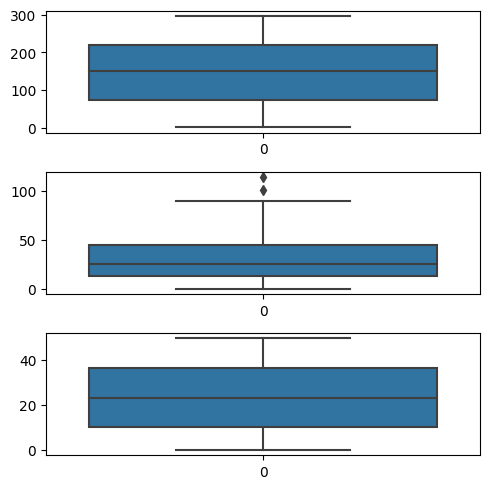

In [11]:
# Outlier Analysis
fig, axs =plt.subplots(3, figsize=(5,5))
plt1= sns.boxplot(advertising["TV"] , ax=axs[0])
plt2= sns.boxplot(advertising["Newspaper"] , ax=axs[1])
plt3= sns.boxplot(advertising["Radio"] , ax=axs[2])
plt.tight_layout()

### There are no considerable outliers present in the data which suggests that the dataset is relatively stable and data points are consistent with overall distribution.

# Exploratory Data Analysis

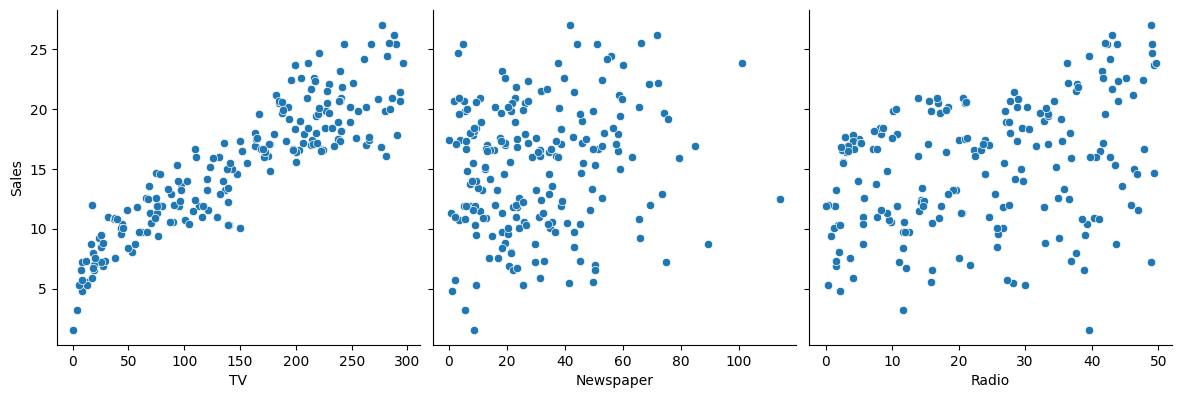

In [12]:
#Plotting scatter plots which shows how Sales are related with other variables
sns.pairplot(advertising, x_vars=["TV","Newspaper", "Radio"], y_vars ="Sales", height=4,aspect=1,kind="scatter")
plt.show()

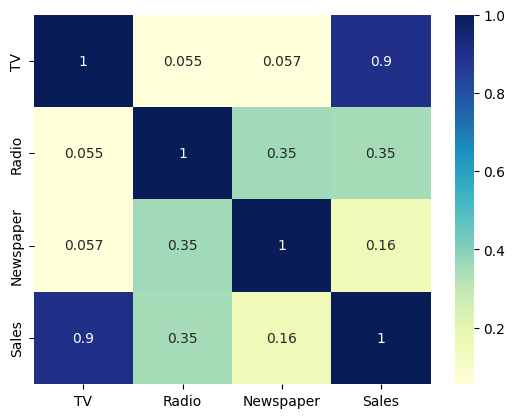

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.show()

### As it is visible from the pairplot and heatmap the variable TV seems to be most correlated with Sales. so let's go ahead and perform simple linear regression using TV as our feature variable. 

# Performing simple linear Regression

In [14]:
X = advertising['TV']
Y = advertising['Sales']

# Train-Test split


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

# Building a linear Model

In [18]:
import statsmodels.api as sm

In [19]:
#Add constant to get y intercept
X_train_sm = sm.add_constant(X_train)

#Fit the regression line using'OLS'(ordinary least square method)
lr= sm.OLS(Y_train,X_train_sm).fit()

In [20]:
# Printing the parameters i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [21]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.52e-52
Time:                        15:25:31   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### Looking at some key statistics from the summary:

The values we are concerned with are -

1.The coefficients and significance (p-values)

2.R-squared

3.F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value

The coefficient is statistically significant.


2. R - squared is 0.816

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.


3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales= 6.948683 + 0.054546*TV

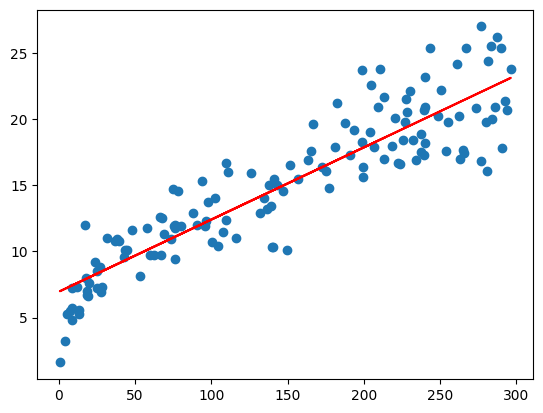

In [22]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,6.948683 + 0.054546*X_train,'r')
plt.show()

# Model Evaluation

## Residual Analysis

### To validate assumptions of the model, and hence the reliability

# Distribution of error terms

### We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [23]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

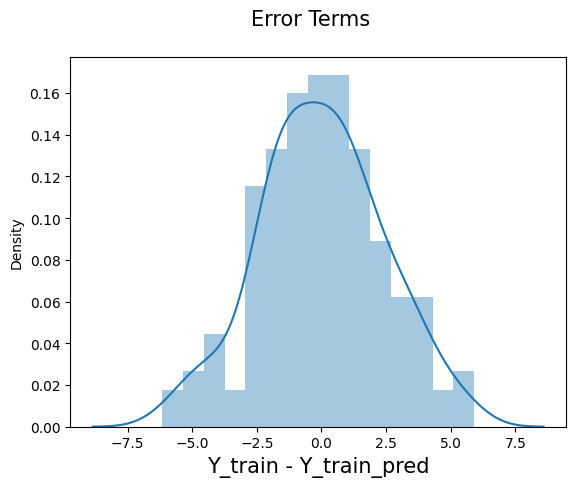

In [24]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Y_train - Y_train_pred',fontsize=15)
plt.show()

### The graph is symmetric and bell-shaped structure without any skewness hence the residual is normally distributed with a mean 0. Therefore the model is all good!



# Predictions on the Test Set

### Now we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [25]:
#Add a constant to X _test
X_test_sm= sm.add_constant(X_test)

#Predicting Y values corresponding to X_test_sm
Y_test_pred=lr.predict(X_test_sm)

In [26]:
Y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

# Looking at RMSE

In [27]:
np.sqrt(mean_squared_error(Y_test,Y_test_pred))

2.019296008966232

# checking the R squared on test set

In [28]:
r_squared=r2_score(Y_test,Y_test_pred)
r_squared

0.792103160124566

### As r_squared = 0.7921, it means that 79.2% of the variability of dependent variable is explained by the independent variables in the model.R_square ranges from 0 to 1. A value of 1 indicates that the model perfectly predicts the dependent variable, explaining all of its variability. A value of 0 indicates that the model does not explain any variability, and its predictions are no better.

# Visualizing the fit on the test set

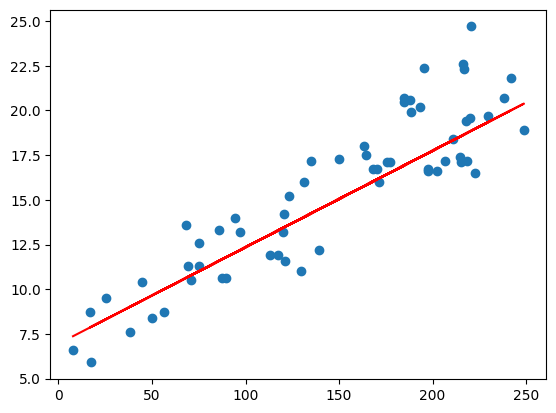

In [29]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()
